In [1]:
import sys
from keras.models import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from sklearn import metrics
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

In [2]:
path = "pamap_scaled.h5"

In [3]:
f = h5py.File(path, 'r')
X = f.get('inputs')
y = f.get('labels') 
print(type(X))
print(type(y))
X = np.array(X)
y = np.array(y)


<class 'h5py._hl.dataset.Dataset'>
<class 'h5py._hl.dataset.Dataset'>


In [4]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state = 100)

In [5]:
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.3, random_state = 100)

In [6]:
trainy_one_hot = to_categorical(y_train)
testy_one_hot = to_categorical(y_test)


In [7]:
X_train.shape, X_test.shape

((4811, 128, 39), (2946, 128, 39))

In [8]:
y_train.shape, y_test.shape

((4811,), (2946,))

In [9]:
trainy_one_hot.shape#, testy_one_hot.shape

(4811, 12)

In [10]:
def class_breakdown(data):
    # convert the numpy array into a dataframe
    df = pd.DataFrame(data)
    # group data by the class value and calculate the number of rows
    counts = df.groupby(0).size()
    # retrieve raw rows
    counts = counts.values
    # summarize
    for i in range(len(counts)):
        percent = counts[i] / len(df) * 100
        print('Class=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))

In [11]:
class_breakdown(y_train)

Class=1, total=82, percentage=1.704
Class=2, total=477, percentage=9.915
Class=3, total=466, percentage=9.686
Class=4, total=490, percentage=10.185
Class=5, total=593, percentage=12.326
Class=6, total=246, percentage=5.113
Class=7, total=424, percentage=8.813
Class=8, total=471, percentage=9.790
Class=9, total=277, percentage=5.758
Class=10, total=232, percentage=4.822
Class=11, total=435, percentage=9.042
Class=12, total=618, percentage=12.846


In [12]:
class_breakdown(y_test)

Class=1, total=78, percentage=2.648
Class=2, total=303, percentage=10.285
Class=3, total=288, percentage=9.776
Class=4, total=294, percentage=9.980
Class=5, total=336, percentage=11.405
Class=6, total=140, percentage=4.752
Class=7, total=254, percentage=8.622
Class=8, total=289, percentage=9.810
Class=9, total=181, percentage=6.144
Class=10, total=168, percentage=5.703
Class=11, total=271, percentage=9.199
Class=12, total=344, percentage=11.677


In [13]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], trainy_one_hot.shape[1]

In [14]:
n_timesteps, n_features, n_outputs

(128, 39, 12)

In [15]:
sys.path.append("..//Base_Models")

In [16]:
import seaborn as sns
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix,classification_report

In [17]:
from model1 import cnn

In [18]:
m1=cnn(n_timesteps, n_features, n_outputs)

In [49]:
model1=m1.do_compile(X_train, X_test,trainy_one_hot,testy_one_hot)

Epoch 1/30
69/69 [==============================] - 6s 63ms/step - loss: 0.0360 - accuracy: 0.9915 - val_loss: 0.0060 - val_accuracy: 0.9993
Epoch 2/30
69/69 [==============================] - 3s 49ms/step - loss: 0.0081 - accuracy: 0.9989 - val_loss: 0.0055 - val_accuracy: 0.9993
Epoch 3/30
69/69 [==============================] - 3s 49ms/step - loss: 0.0077 - accuracy: 0.9979 - val_loss: 0.0174 - val_accuracy: 0.9929
Epoch 4/30
69/69 [==============================] - 3s 49ms/step - loss: 0.0096 - accuracy: 0.9963 - val_loss: 0.1667 - val_accuracy: 0.9794
Epoch 5/30
69/69 [==============================] - 3s 50ms/step - loss: 0.0137 - accuracy: 0.9977 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 6/30
69/69 [==============================] - 3s 49ms/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 0.0040 - val_accuracy: 0.9996
Epoch 7/30
69/69 [==============================] - 3s 48ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0024 - val_accuracy: 0.9993
Epoch 8/30
69

[[214   0   0   0   0   0   0   0   0   0   0   0]
 [  0 197   0   0   0   0   0   0   0   0   0   0]
 [  0   0 238   0   0   0   0   0   0   0   0   0]
 [  0   0   0 233   0   0   0   0   0   0   0   0]
 [  0   0   0   0 212   1   0   0   0   0   0   0]
 [  0   0   0   0   0 244   0   0   0   0   0   0]
 [  0   0   0   0   0   0 234   0   0   0   0   0]
 [  0   0   0   0   0   0   0 214   0   0   0   0]
 [  0   0   0   0   0   0   0   0 231   0   0   0]
 [  0   0   0   0   0   0   0   0   0 211   0   0]
 [  0   0   0   0   0   0   0   0   0   0 223   0]
 [  0   0   0   0   0   0   0   0   0   0   0 224]]
0.999626307922272
classification_report of model1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00       197
           2       1.00      1.00      1.00       238
           3       1.00      1.00      1.00       233
           4       1.00      1.00      1.00       213
           

<AxesSubplot:>

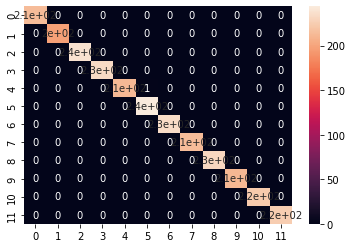

In [18]:
predy=m1.prediction(X_test)
cm=confusion_matrix(y_test,predy)
print(cm)
print(acc(y_test,predy))
print("classification_report of model1:")
print(classification_report(y_test,predy))
sns.heatmap(cm, annot=True)

In [19]:
model1.save("Models_h5//model1.h5")

In [19]:
from model2 import cnn_lstm

In [20]:
m2=cnn_lstm(n_timesteps, n_features, n_outputs)

In [21]:
model2=m2.do_compile(X_train,X_test,trainy_one_hot,testy_one_hot)

Epoch 1/30
76/76 [==============================] - 26s 105ms/step - loss: 1.1103 - accuracy: 0.6394 - val_loss: 0.4130 - val_accuracy: 0.9039
Epoch 2/30
76/76 [==============================] - 5s 62ms/step - loss: 0.3723 - accuracy: 0.8925 - val_loss: 0.2720 - val_accuracy: 0.9257
Epoch 3/30
76/76 [==============================] - 5s 62ms/step - loss: 0.2465 - accuracy: 0.9287 - val_loss: 0.1981 - val_accuracy: 0.9433
Epoch 4/30
76/76 [==============================] - 5s 62ms/step - loss: 0.1879 - accuracy: 0.9464 - val_loss: 0.1725 - val_accuracy: 0.9542
Epoch 5/30
76/76 [==============================] - 5s 61ms/step - loss: 0.1538 - accuracy: 0.9528 - val_loss: 0.1631 - val_accuracy: 0.9572
Epoch 6/30
76/76 [==============================] - 5s 62ms/step - loss: 0.1233 - accuracy: 0.9634 - val_loss: 0.1455 - val_accuracy: 0.9640
Epoch 7/30
76/76 [==============================] - 5s 62ms/step - loss: 0.1190 - accuracy: 0.9665 - val_loss: 0.1377 - val_accuracy: 0.9633
Epoch 8/30


[[ 76   0   0   0   0   0   0   1   0   0   1   0]
 [  0 296   3   0   0   1   0   0   2   0   1   0]
 [  0   0 278   3   0   0   0   0   0   0   7   0]
 [  0   0   3 277   0   0   0   0   0   0   2  12]
 [  0   0   0   0 331   0   0   4   0   0   1   0]
 [  1   0   2   1   0 135   1   0   0   0   0   0]
 [  0   0   0   0   0   0 254   0   0   0   0   0]
 [  0   0   3   0   0   0   0 286   0   0   0   0]
 [  0   0   0   1   0   0   1   0 174   1   4   0]
 [  0   0   1   2   0   0   1   0   7 148   8   1]
 [  0   0   1   0   0   0   0   0   2   2 264   2]
 [  0   0   0   2   0   0   0   0   0   0   1 341]]
0.9708078750848609
classification_report of model2:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        78
           1       1.00      0.98      0.99       303
           2       0.96      0.97      0.96       288
           3       0.97      0.94      0.96       294
           4       1.00      0.99      0.99       336
          

<AxesSubplot:>

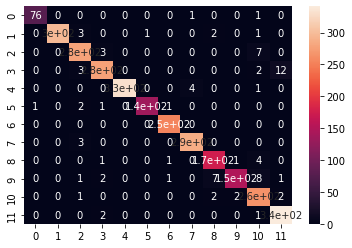

In [22]:
predy=m2.prediction(X_test)
cm=confusion_matrix(y_test,predy)
print(cm)
print(acc(y_test,predy))
print("classification_report of model2:")
print(classification_report(y_test,predy))
sns.heatmap(cm, annot=True)

In [23]:
model2.save("Models_h5//model2.h5")

In [21]:
from model3 import Conv_LSTM

In [25]:
m3=Conv_LSTM(n_timesteps, n_features, n_outputs)

In [26]:
model3=m3.do_compile(X_train,X_test,trainy_one_hot,testy_one_hot)

INFO:tensorflow:Reloading Oracle from existing project output\HAR_ConvLstm\oracle.json
INFO:tensorflow:Reloading Tuner from output\HAR_ConvLstm\tuner0.json
INFO:tensorflow:Oracle triggered exit


NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for output\HAR_ConvLstm\trial_a341852071a398bd254ecfdee9cee07d\checkpoint

In [30]:
predy=m3.prediction(X_test)
cm=confusion_matrix(y_test,predy)
print(cm)
print(acc(y_test,predy))
print("classification_report of model3:")
print(classification_report(y_test,predy))
sns.heatmap(cm, annot=True)

[[ 56   0   0   0   0   0   0   0   0   0   0   0]
 [  3 267   1   0   0   0   0   0   2   1   0   0]
 [  0   0 270   5   0   1   0   0   0   1   2   0]
 [  0   0   1 306   0   0   0   0   0   0   4   3]
 [  0   0   0   0 336   0   0   1  11   0   0   0]
 [  2   0   0   0   1 146   0   2   1   0   0   0]
 [  0   0   0   0   0   1 258   0   1   0   0   2]
 [  3   0   0   0   0   0   1 282   0   0   0   0]
 [  0   0   0   0   0   0   0   0 187   5   3   1]
 [  0   1   2   0   0   0   0   0  12 146   1   0]
 [  0   0   2   2   0   0   0   0   2   1 234   3]
 [  0   0   0   6   0   0   0   0   0   0   1 366]]
0.9687712152070604
classification_report of model3:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        56
           1       1.00      0.97      0.99       274
           2       0.98      0.97      0.97       279
           3       0.96      0.97      0.97       314
           4       1.00      0.97      0.98       348
          

<AxesSubplot:>

In [31]:
model3.save("Models_h5//model3.h5")

In [27]:
from model4 import Layered_LSTM

In [28]:
m4=Layered_LSTM(n_timesteps, n_features, n_outputs)

In [29]:
model4=m4.do_compile(X_train,X_test,trainy_one_hot,testy_one_hot)

Epoch 1/30
69/69 [==============================] - 9s 77ms/step - loss: 0.5807 - accuracy: 0.8284 - val_loss: 1.8065 - val_accuracy: 0.4425
Epoch 2/30
69/69 [==============================] - 4s 52ms/step - loss: 0.0914 - accuracy: 0.9863 - val_loss: 0.8474 - val_accuracy: 0.7978
Epoch 3/30
69/69 [==============================] - 4s 52ms/step - loss: 0.1278 - accuracy: 0.9712 - val_loss: 1.1866 - val_accuracy: 0.7384
Epoch 4/30
69/69 [==============================] - 4s 53ms/step - loss: 0.0716 - accuracy: 0.9876 - val_loss: 0.6491 - val_accuracy: 0.8688
Epoch 5/30
69/69 [==============================] - 4s 52ms/step - loss: 0.0587 - accuracy: 0.9872 - val_loss: 0.2624 - val_accuracy: 0.9454
Epoch 6/30
69/69 [==============================] - 4s 53ms/step - loss: 0.0435 - accuracy: 0.9902 - val_loss: 0.0795 - val_accuracy: 0.9854
Epoch 7/30
69/69 [==============================] - 4s 52ms/step - loss: 0.0719 - accuracy: 0.9826 - val_loss: 2.4449 - val_accuracy: 0.6229
Epoch 8/30
69

[[213   0   0   1   0   0   0   0   0   0   0   0]
 [  0 197   0   0   0   0   0   0   0   0   0   0]
 [  0   0 232   6   0   0   0   0   0   0   0   0]
 [  0   0   0 232   1   0   0   0   0   0   0   0]
 [  0   0   0   0 212   1   0   0   0   0   0   0]
 [  0   0   0   0   0 244   0   0   0   0   0   0]
 [  0   0   0   0   0   0 234   0   0   0   0   0]
 [  0   0   0   0   0   0   0 214   0   0   0   0]
 [  0   0   0   0   0   0   0   0 231   0   0   0]
 [  0   0   0   0   0   0   0   0   0 211   0   0]
 [  0   0   0   0   0   0   0   0   0   0 223   0]
 [  0   0   0   0   0   0   0   1   0   0   0 223]]
0.9962630792227205
classification_report of model4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       214
           1       1.00      1.00      1.00       197
           2       1.00      0.97      0.99       238
           3       0.97      1.00      0.98       233
           4       1.00      1.00      1.00       213
          

<AxesSubplot:>

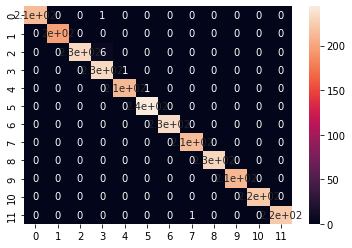

In [30]:
predy=m4.prediction(X_test)
cm=confusion_matrix(y_test,predy)
print(cm)
print(acc(y_test,predy))
print("classification_report of model4:")
print(classification_report(y_test,predy))
sns.heatmap(cm, annot=True)

In [36]:
model4.save("Models_h5//model4.h5")